In [1]:
import pygad
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
from sklearn import metrics as mt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv("heart.csv")
y = data['target']
x = data.drop(['target'],axis=1)
label = "heart Dieseas"

In [3]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [4]:
y_test.value_counts()

1    47
0    44
Name: target, dtype: int64

In [5]:
parameters = {'max_depth' : (1,2,3,4,5,6,7,8,9)
              , 'criterion' : ('gini', 'entropy')
              , 'min_samples_split' : (2,3,4,5,6,7,8)
              ,'min_samples_leaf' : (1,2,3,4,5,6,7,8,9,10)
             }

In [6]:
def score(model,x,y):
    y_pred = model.predict(x)
    return mt.accuracy_score(y,y_pred)

In [7]:
def getParams(params):
    return params["max_depth"],params["criterion"],params['min_sample_split'],params["min_samples_leaf"]

[[31 13]
 [ 2 45]]
Training Accuracy: 1.00
Testing Accuracy: 0.84
F1-Score : 0.8571428571428572


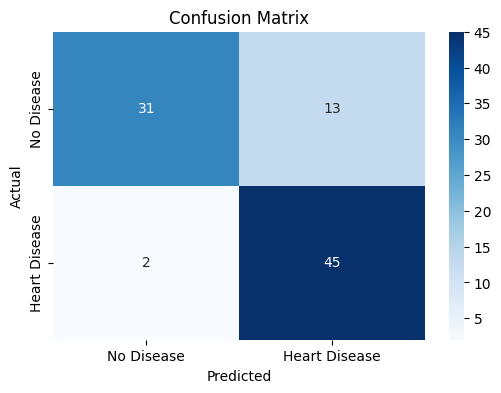

In [8]:
default_dt = DecisionTreeClassifier(random_state=1)
default_dt.fit(x_train,y_train)
y_pred = default_dt.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Evaluate the model's accuracy on training and testing data
train_accuracy = default_dt.score(x_train, y_train)
test_accuracy = default_dt.score(x_test, y_test)

# Print the model's accuracy
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

#f1 score
f1 = f1_score(y_test,y_pred)
print(f"F1-Score : {f1}")
# print(np.unique(y))
# plt.figure(figsize=(20, 10))
# plot_tree(default_dt, filled=True, feature_names=x.columns, class_names=np.unique(y))
# plt.show()
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
def getRandomSearchResult(x_train,y_train,x_test,y_test):
    DT_grid  = RandomizedSearchCV(
        DecisionTreeClassifier(random_state=1),
        param_distributions = parameters,
        cv = 5,
        scoring=score
    )
    DT_grid.fit(x_train,y_train)
    params = DT_grid.best_params_
    # params['criterion'] = 'entropy'
    dt = DecisionTreeClassifier(**params,random_state=1)
    dt.fit(x_train,y_train)
    accuracy = score(dt,x_test,y_test)
    y_pred = dt.predict(x_test)
    f1 = f1_score(y_test,y_pred)
    return params,accuracy,f1
getRandomSearchResult(x_train,y_train,x_test,y_test)

({'min_samples_split': 5,
  'min_samples_leaf': 9,
  'max_depth': 5,
  'criterion': 'entropy'},
 0.8131868131868132,
 0.8282828282828283)

In [10]:
def f_measure(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return 2 * (precision * recall) / (precision + recall)

In [11]:
def getGridSearch(x_train,y_train,x_test,y_test):
    DT_grid  = GridSearchCV(
        DecisionTreeClassifier(random_state=1),
        param_grid = parameters,
        cv = 5,
        scoring=score,
        n_jobs = -1
    )
    DT_grid.fit(x_train,y_train)
    params = DT_grid.best_params_
    # params['criterion'] = 'entropy'
    dt = DecisionTreeClassifier(**params,random_state=1)
    dt.fit(x_train,y_train)
    accuracy = score(dt,x_test,y_test)
    y_pred = dt.predict(x_test)
    f1 = f1_score(y_test,y_pred)
    return params,accuracy,f1

In [12]:
data = []
for i in range(10):
    
    params,accuracy,f1 = getRandomSearchResult(x_train,y_train,x_test,y_test)
    v = [params['max_depth'],params['criterion'],params['min_samples_split'],params['min_samples_leaf'],accuracy,f1]
    # print(f"{i} :- {params,accuracy}")
    data.append(v)
data

df = pd.DataFrame(data,columns=['max_depth','criterion','min_samples_split','min_samples_leaf','accuracy','f1'])

In [13]:
print(label)
df

heart Dieseas


,max_depth,criterion,min_samples_split,min_samples_leaf,accuracy,f1
0,4,gini,4,1,0.791209,0.804124
1,8,gini,2,5,0.835165,0.842105
2,6,gini,3,3,0.868132,0.880000
3,7,gini,6,5,0.835165,0.842105
4,4,gini,6,7,0.791209,0.804124
5,8,gini,7,4,0.857143,0.865979
6,9,gini,6,5,0.835165,0.842105
7,5,gini,4,7,0.791209,0.795699
8,5,gini,7,7,0.791209,0.795699
9,7,gini,8,8,0.791209,0.804124


[[35  9]
 [ 3 44]]
Training Accuracy: 0.92
Testing Accuracy: 0.87
F1-Score : 0.88


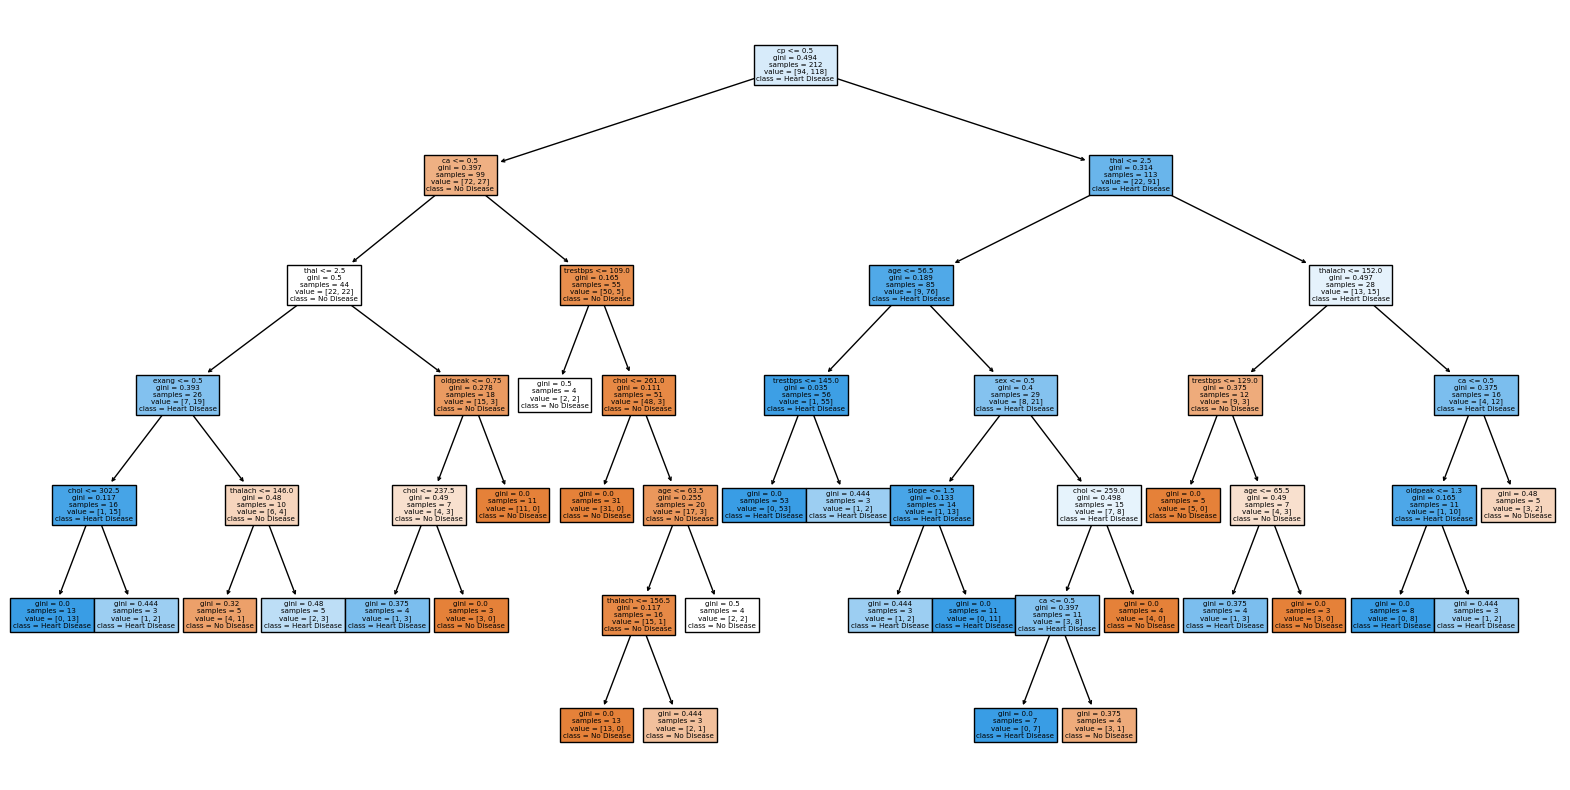

In [14]:
best = df.iloc[df['f1'].idxmax(),:]
best_random_params = best.drop(['accuracy','f1']).to_dict()
random_best = DecisionTreeClassifier(**best_random_params,random_state=1)
random_best.fit(x_train,y_train)
y_pred = random_best.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Evaluate the model's accuracy on training and testing data
train_accuracy = random_best.score(x_train, y_train)
test_accuracy = random_best.score(x_test, y_test)

# Print the model's accuracy
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

#f1 score
f1 = f1_score(y_test,y_pred)
print(f"F1-Score : {f1}")


plt.figure(figsize=(20, 10))
plot_tree(random_best, filled=True, feature_names=x.columns, class_names=['No Disease', 'Heart Disease'])
plt.show()


In [15]:
df.to_csv(f'Result_{label}_Rendom.csv')

In [16]:
data = []
for i in range(2):
    params,accuracy,f1 = getGridSearch(x_train,y_train,x_test,y_test)
    v = [params['max_depth'],params['criterion'],params['min_samples_split'],params['min_samples_leaf'],accuracy,f1]
    # print(f"{i} :- {params,accuracy}")
    data.append(v)
data
df = pd.DataFrame(data,columns=['max_depth','criterion','min_samples_split','min_samples_leaf','accuracy','f1'])

In [ ]:
print(label)
df

heart Dieseas


,max_depth,criterion,min_samples_split,min_samples_leaf,accuracy,f1
0,6,gini,2,5,0.835165,0.842105
1,6,gini,2,5,0.835165,0.842105


[[36  8]
 [ 7 40]]
Training Accuracy: 0.89
Testing Accuracy: 0.84
F1-Score : 0.8421052631578947


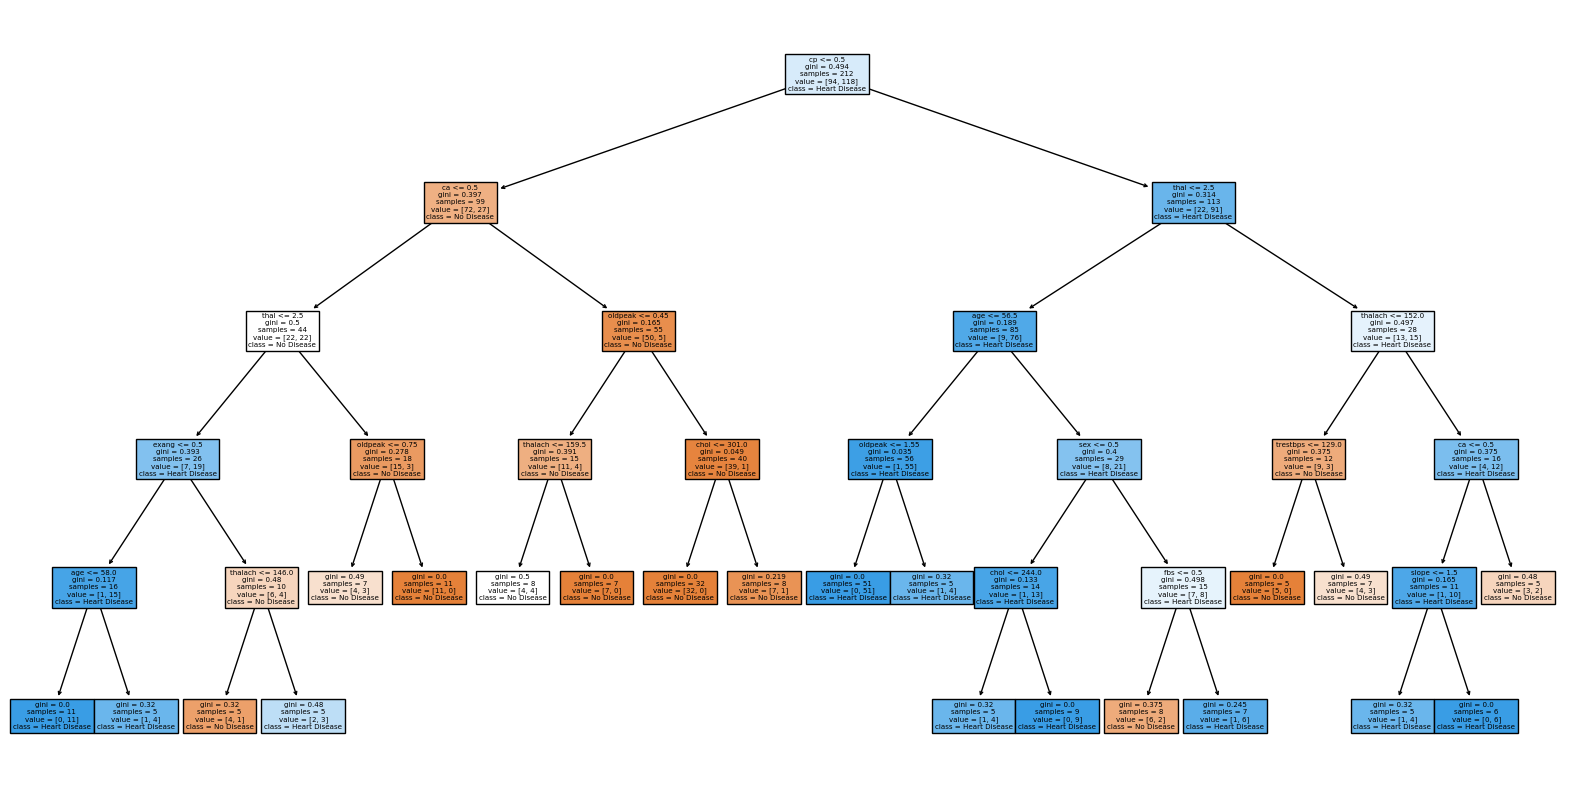

In [ ]:
best = df.iloc[df['f1'].idxmax(),:]
best_grid_params = best.drop(['accuracy','f1']).to_dict()
grid_best = DecisionTreeClassifier(**best_grid_params,random_state=1)
grid_best.fit(x_train,y_train)
y_pred = grid_best.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Evaluate the model's accuracy on training and testing data
train_accuracy = grid_best.score(x_train, y_train)
test_accuracy = grid_best.score(x_test, y_test)

# Print the model's accuracy
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

#f1 score
f1 = f1_score(y_test,y_pred)
print(f"F1-Score : {f1}")


plt.figure(figsize=(20, 10))
plot_tree(grid_best, filled=True, feature_names=x.columns, class_names=['No Disease', 'Heart Disease'])
plt.show()

In [ ]:
df.to_csv(f'Result_{label}_grid.csv')

Genetic

In [ ]:
def get_pramas(solution):
    max_depth = solution[1]
    if(max_depth > 9):
        max_depth = 9
    if(max_depth < 1):
        max_depth = 1
    c = solution[2]
    
    criterion = 'gini' if (c % 2) else 'entropy'
    
    m = solution[3]


    # max_features = 'sqrt' if m % 2 else 'log2'

    min_samples_split = solution[4]

    if(min_samples_split > 8):
        min_samples_split = 8
    if(min_samples_split < 2):
        min_samples_split = 2
    min_samples_leaf = solution[5]
    if(min_samples_leaf > 10):
        min_samples_leaf = 10
    if(min_samples_leaf < 1):
        min_samples_leaf = 1
    return max_depth,criterion,min_samples_split,min_samples_leaf

In [ ]:
def fitness_function(ga,solution,solution_id):
    # print(ga.population)
    max_depth,criterion,min_samples_split,min_samples_leaf = get_pramas(solution=solution)
    dt_model = DecisionTreeClassifier(
        max_depth=max_depth,
        criterion=criterion,
        min_samples_split=min_samples_split,
        min_samples_leaf = min_samples_leaf,
        random_state=1)
    dt_model.fit(x_train,y_train)
    accuracy = dt_model.score(x_test,y_test)
    # print(f'asssas sasa : {ga.population}')
    # print(f"depth : - {max_depth} and {accuracy}")
    return score(dt_model,x_test,y_test)

In [ ]:
ga_instance = pygad.GA(num_generations=1000,
                       num_parents_mating=3,
                       fitness_func=fitness_function,
                       num_genes=6,
                       gene_type=int,
                       sol_per_pop=15,
                       init_range_low=1,
                       init_range_high=20,
                       mutation_probability=.1,
                       crossover_probability=.8
                       )

In [ ]:
genes = {}
ga_instance.run()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
max_depth,criterion,min_samples_split,min_samples_leaf = get_pramas(solution=solution)
print(f"result ..... {get_pramas(solution)}")

Parameters of the best solution : [0 6 1 0 0 3]
Fitness value of the best solution = 0.8681318681318682
result ..... (6, 'gini', 2, 3)


In [ ]:
ga_best = DecisionTreeClassifier(
    random_state=1,
   max_depth=max_depth,
        criterion=criterion,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
    )
ga_best.fit(x_train,y_train)
test_ac = score(ga_best,x_test,y_test)
train_ac = score(ga_best,x_train,y_train)
print(f'train Score : {train_ac}')
print(f'test Score : {test_ac}')

train Score : 0.9198113207547169
test Score : 0.8681318681318682


[[35  9]
 [ 3 44]]
Training Accuracy: 0.92
Testing Accuracy: 0.87
F1-Score : 0.88


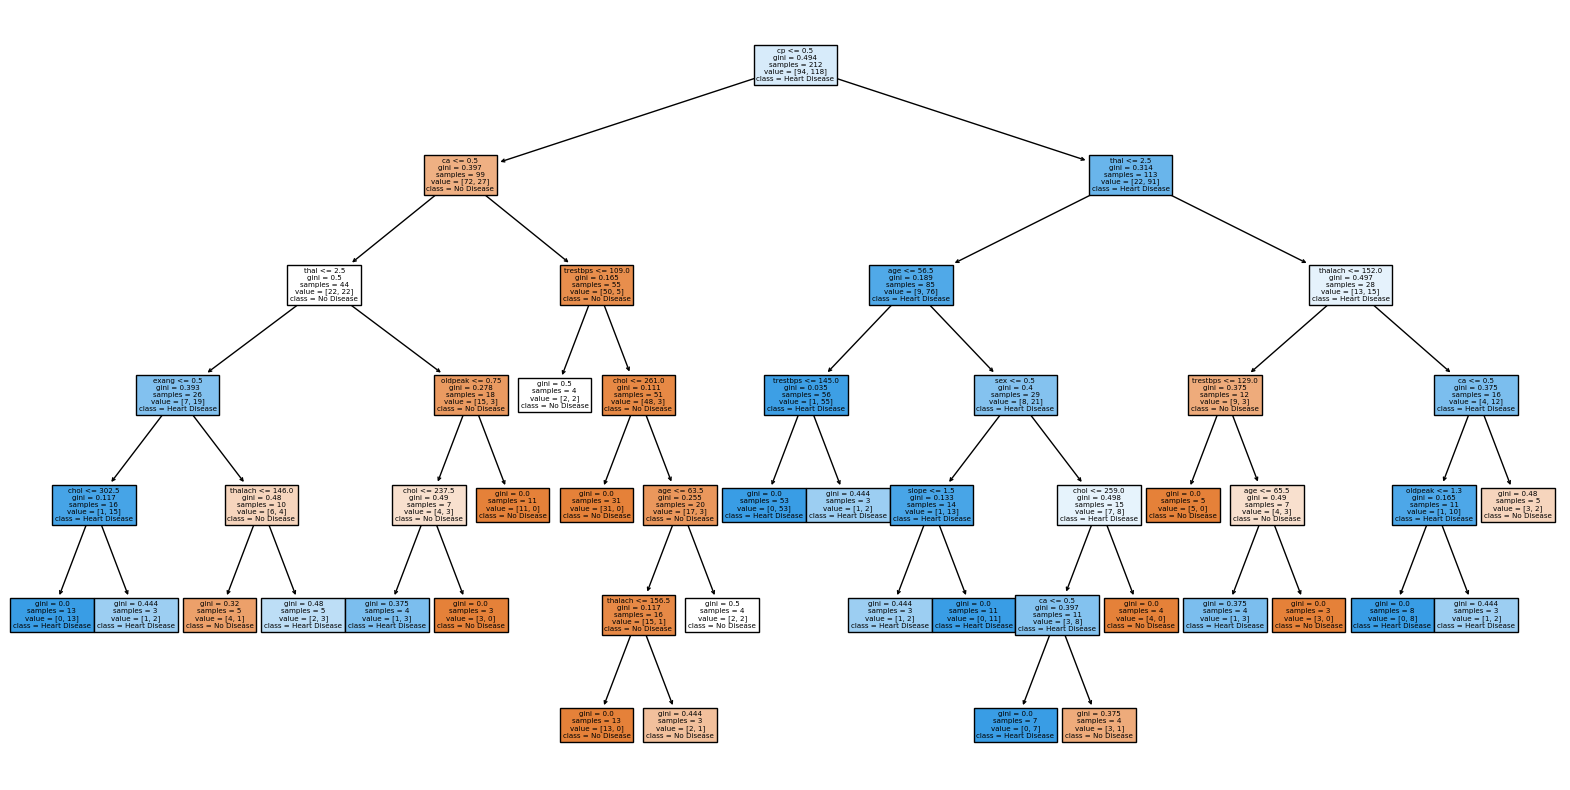

In [ ]:

y_pred = ga_best.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Evaluate the model's accuracy on training and testing data
train_accuracy = ga_best.score(x_train, y_train)
test_accuracy = ga_best.score(x_test, y_test)

# Print the model's accuracy
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

#f1 score
f1 = f1_score(y_test,y_pred)
print(f"F1-Score : {f1}")


plt.figure(figsize=(20, 10))
plot_tree(ga_best, filled=True, feature_names=x.columns, class_names=['No Disease', 'Heart Disease'])
plt.show()